In [1]:
import torch
from torch.utils.data import DataLoader 
import torchvision 
from matplotlib import pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [2]:
from helpers import * 
from train import *
from utils import UNet
from plot import * 
from sampling import * 

## Load data

In [3]:
dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor())

In [4]:
train_dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [5]:
x, y = next(iter(train_dataloader))

## Observe the corrupted data 

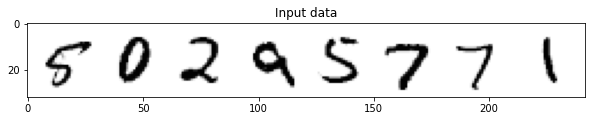

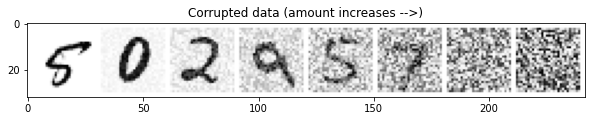

In [6]:
plot_data(x, data=True, corrupted =True, predicted=False)

## Training

In [7]:
losses = train(dataset, epochs=30, learning_rate=1e-3, batch_size=128)

  0%|          | 0/30 [00:00<?, ?it/s]


AttributeError: 'UNet' object has no attribute 'down_layers'

ZeroDivisionError: integer division or modulo by zero

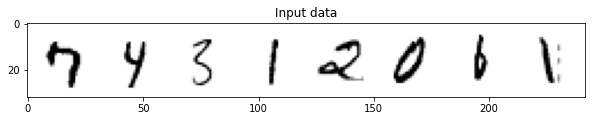

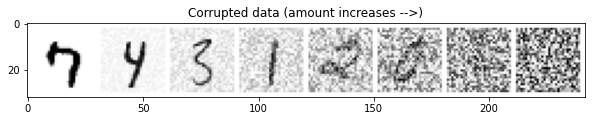

In [8]:
#We can try to see what the model predictions look like by grabbing a batch of data
#corrupting it my different amounts 
#and then seeing the models predictions:

# Fetch some data
x, y = next(iter(train_dataloader))
x = x[:8] # Only using the first 8 for easy plotting

#Plot
plot_data(x, data=True, corrupted =True, predicted=True)

## Sampling 

In [12]:
steps=50
step_history, pred_output_history = sampling(steps)

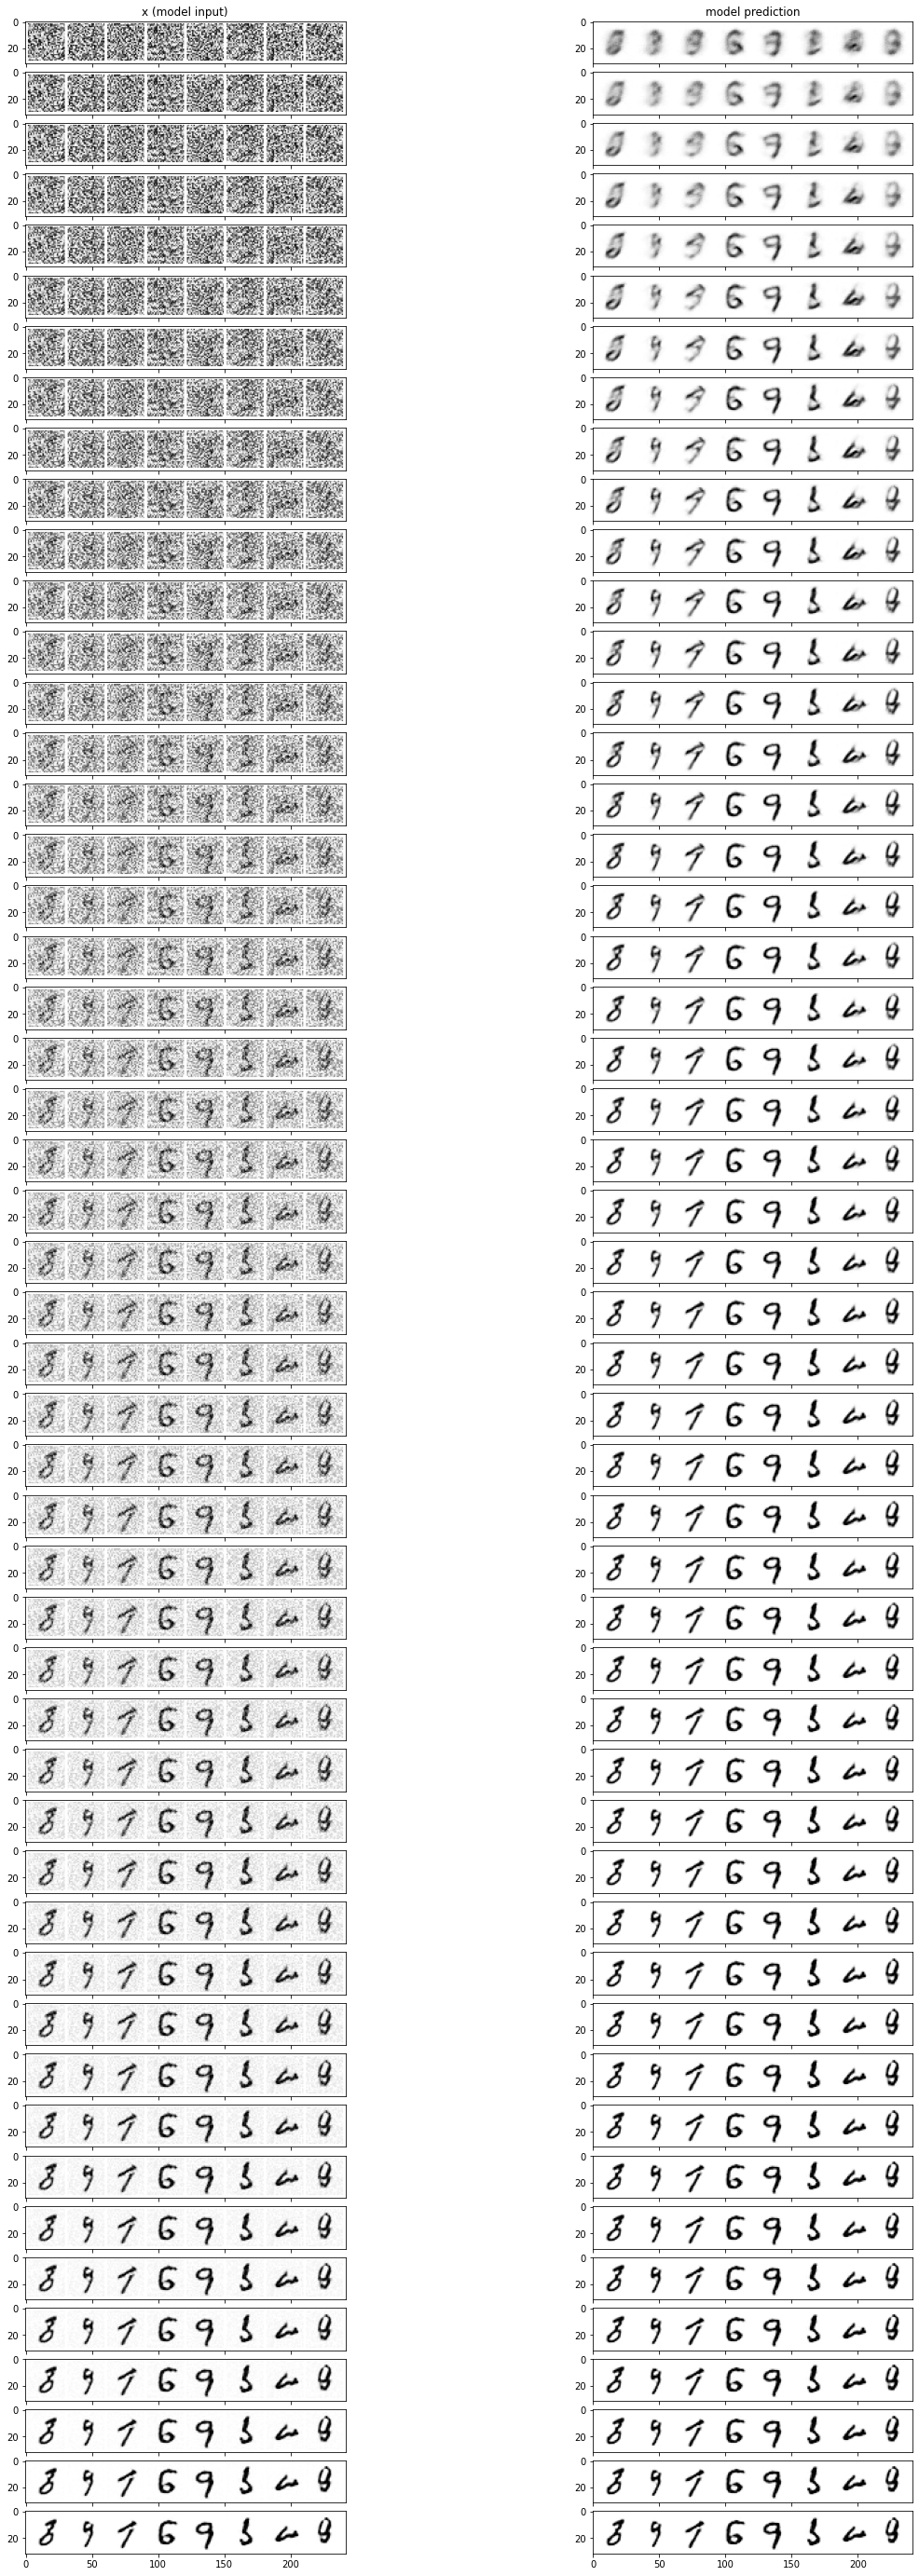

In [13]:
fig, axs = plt.subplots(steps, 2, figsize=(20, 50), sharex=True)
axs[0,0].set_title('x (model input)')
axs[0,1].set_title('model prediction')
for i in range(steps):
    axs[i, 0].imshow(torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap='Greys')
    axs[i, 1].imshow(torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1), cmap='Greys') 